<div style="text-align:center">
    <h1>
        n-step SARSA
    </h1>
</div>

<br><br>

<div style="text-align:center">
    In this notebook we are going to combine the temporal difference method SARSA with n-step bootstrapping. The resulting algorithm is called n-step SARSA and uses the following target for the updates:
</div>

\begin{equation}
\hat G_t = R_{t+1} + \gamma R_{t+2} + \cdots + \gamma^{n-1} R_{n} + \gamma Q(S_n, A_n)
\end{equation}

<br>

<div style="text-align:center">
    This method follows an on-policy strategy, in which the same policy that is optimized is responsible for exploring the environment.
</div>


<br>



<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 6 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch import optim
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
from IPython.display import clear_output
from pathlib import Path

import random, os.path, math, glob, csv, base64, itertools, sys
import gym
from gym.wrappers import Monitor
from pprint import pprint

# The following code is will be used to visualize the environments.

def show_video(directory):
    html = []
    for mp4 in Path(directory).glob("*.mp4"):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append('''<video alt="{}" autoplay 
                      loop controls style="height: 400px;">
                      <source src="data:video/mp4;base64,{}" type="video/mp4" />
                 </video>'''.format(mp4, video_b64.decode('ascii')))
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))
    
display = Display(visible=0, size=(1400, 900))
display.start();

def make_seed(seed):
    np.random.seed(seed=seed)
    torch.manual_seed(seed=seed)
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Create the environment, value table and policy

#### Create the environment

In [3]:
env = Maze()

#### Create the $Q(s, a)$ table

In [4]:
action_values = np.zeros(shape=(5, 5, 4))

#### Create the policy $\pi(s)$

In [5]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Plot the value table $Q(s,a)$

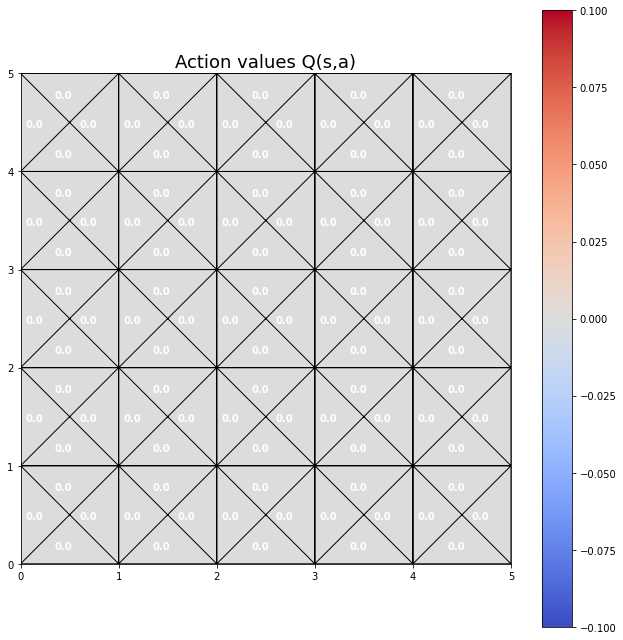

In [6]:
plot_action_values(action_values)

#### Plot the policy

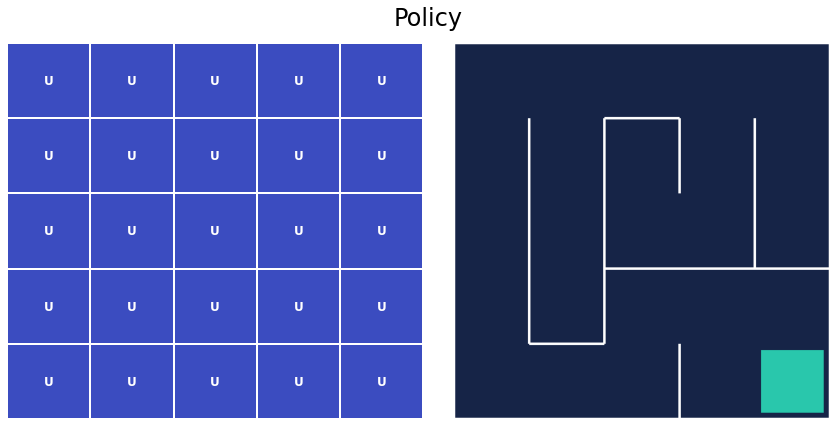

In [7]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm

</br>

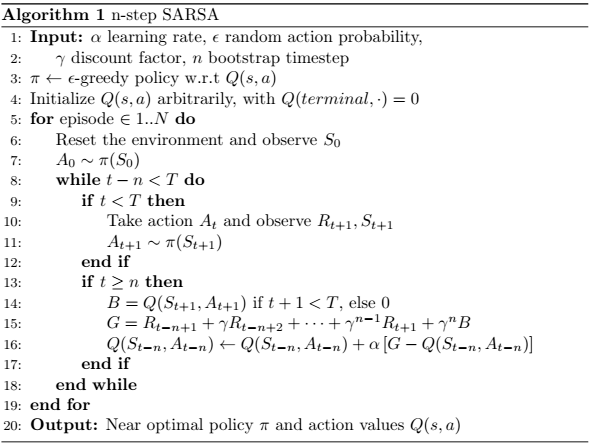

In [12]:
def n_sarsa(action_values, policy, episodes, alpha = 0.1, gamma = 0.99, epsilon=0.2, n =8):
    for episode in range(1, episodes +1):
        state = env.reset()
        action = policy(state, epsilon)
        transitions  = []
        done = False
        t = 0
        while t-n <len(transitions):
            # execute an action in the env
            if not done:
                next_state, reward, done, _ = env.step(action)
                next_action = policy(next_state, epsilon)
                transitions.append([state, action, reward])
            
            
            # update q value estimates
            if t>= n:
                # G = r1 + gamma * r2 + gamma^2 * r3 + ... + gamma^n * Q(Sn, An)
                G= (1-done) * action_values[next_state][next_action]
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward_t + gamma * G
                action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])
            t+=1
            state = next_state
            action = next_action
    
    

In [13]:
n_sarsa(action_values, policy, 10000, alpha = 0.1, gamma = 0.99, epsilon=0.2, n =8)

## Show results

#### Show resulting value table $Q(s, a)$

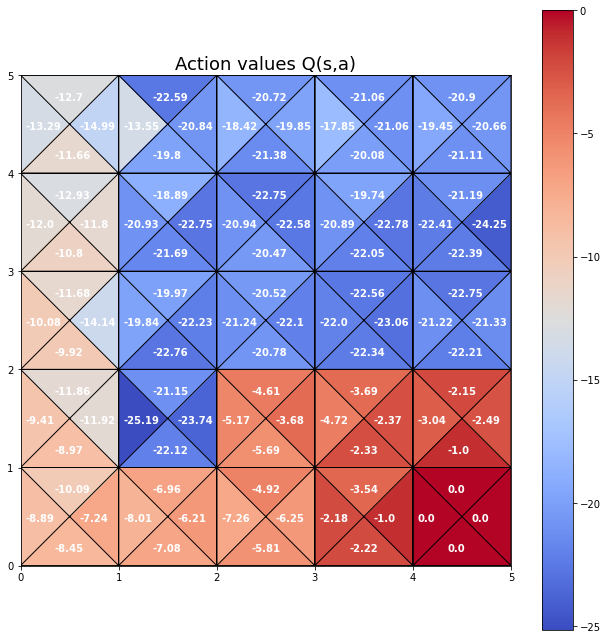

In [14]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

In [ ]:
plot_policy(action_values, env.render(mode='rgb_array'))

#### Test the resulting agent

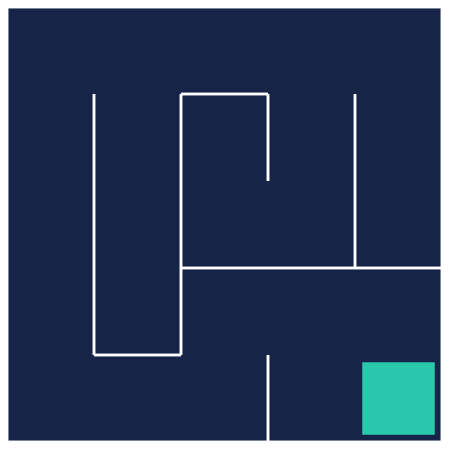

In [15]:
test_agent(env, policy, episodes=1)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 7: n-step bootstrapping](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)